# House Prices 

Here, we aim to develop the most parsimonious model for predicting house prices. The dataset contains various features related to property characteristics. While some variables are numerical, others are categorical and the dataset also includes missing values in certain columns. Our primary aim is to find the moste relevant predictors of house prices. 

## Explore the Dtaa

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [23]:
house_df = pd.read_csv("data/housing.csv")
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Checking for missing values

In [25]:
missing_values = house_df.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Get the data types of the columns with missing values
missing_types = house_df.dtypes[missing_values.index]

# Combine missing values and data types into a single DataFrame for easy reading
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Data Type': missing_types
})

print(missing_info)

              Missing Values Data Type
LotFrontage              259   float64
Alley                   1369    object
MasVnrType               872    object
MasVnrArea                 8   float64
BsmtQual                  37    object
BsmtCond                  37    object
BsmtExposure              38    object
BsmtFinType1              37    object
BsmtFinType2              38    object
Electrical                 1    object
FireplaceQu              690    object
GarageType                81    object
GarageYrBlt               81   float64
GarageFinish              81    object
GarageQual                81    object
GarageCond                81    object
PoolQC                  1453    object
Fence                   1179    object
MiscFeature             1406    object


In [26]:
# Drop the columns with too many missing values
columns_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
house_df.drop(columns=columns_to_drop, inplace=True)

# Check if the columns were dropped successfully
print(house_df.head())  # Display the first few rows to confirm

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0    

In [27]:
missing_values = house_df.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Get the data types of the columns with missing values
missing_types = house_df.dtypes[missing_values.index]

# Combine missing values and data types into a single DataFrame for easy reading
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Data Type': missing_types
})

print(missing_info)

              Missing Values Data Type
LotFrontage              259   float64
MasVnrType               872    object
MasVnrArea                 8   float64
BsmtQual                  37    object
BsmtCond                  37    object
BsmtExposure              38    object
BsmtFinType1              37    object
BsmtFinType2              38    object
Electrical                 1    object
FireplaceQu              690    object
GarageType                81    object
GarageYrBlt               81   float64
GarageFinish              81    object
GarageQual                81    object
GarageCond                81    object


In [28]:
# Fill in the float columns with the mean

# List of specific columns you want to target
float_columns_to_fill = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

# Fill missing values in these specific float columns with the mean of each column
for col in float_columns_to_fill:
    if col in house_df.columns:  # Ensure the column exists in the DataFrame
        mean_value = house_df[col].mean()
        house_df[col].fillna(mean_value, inplace=True)

# Optional: Check that the missing values have been filled
missing_values_after_fill = house_df.isnull().sum()
missing_values_after_fill = missing_values_after_fill[missing_values_after_fill > 0]
print(missing_values_after_fill)

MasVnrType      872
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


C:\Users\Ellaine2\AppData\Local\Temp\ipykernel_20656\3406734082.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_df[col].fillna(mean_value, inplace=True)


In [29]:
# Print the first few rows of the selected columns

columns_to_print = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
print(house_df[columns_to_print].head())

  MasVnrType BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0    BrkFace       Gd       TA           No          GLQ          Unf   
1        NaN       Gd       TA           Gd          ALQ          Unf   
2    BrkFace       Gd       TA           Mn          GLQ          Unf   
3        NaN       TA       Gd           No          ALQ          Unf   
4    BrkFace       Gd       TA           Av          GLQ          Unf   

  Electrical FireplaceQu GarageType GarageFinish GarageQual GarageCond  
0      SBrkr         NaN     Attchd          RFn         TA         TA  
1      SBrkr          TA     Attchd          RFn         TA         TA  
2      SBrkr          TA     Attchd          RFn         TA         TA  
3      SBrkr          Gd     Detchd          Unf         TA         TA  
4      SBrkr          TA     Attchd          RFn         TA         TA  


In [30]:
print(house_df['Fireplaces'])
print(house_df['FireplaceQu'])

0       0
1       1
2       1
3       1
4       1
       ..
1455    1
1456    2
1457    2
1458    0
1459    0
Name: Fireplaces, Length: 1460, dtype: int64
0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object


In [31]:
# List of basement-related columns
basement_columns = [
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2'
]

# Print only the basement-related columns
print(house_df[basement_columns])

     BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  BsmtUnfSF  \
0          Gd       TA           No          GLQ          Unf        150   
1          Gd       TA           Gd          ALQ          Unf        284   
2          Gd       TA           Mn          GLQ          Unf        434   
3          TA       Gd           No          ALQ          Unf        540   
4          Gd       TA           Av          GLQ          Unf        490   
...       ...      ...          ...          ...          ...        ...   
1455       Gd       TA           No          Unf          Unf        953   
1456       Gd       TA           No          ALQ          Rec        589   
1457       TA       Gd           No          GLQ          Unf        877   
1458       TA       TA           Mn          GLQ          Rec          0   
1459       TA       TA           No          BLQ          LwQ        136   

      BsmtFinSF1  BsmtFinSF2  
0            706           0  
1            978         

In [42]:
# Filling missing values based on logical assumptions and domain knowledge

# Fill MasVnrType with the mode (most frequent value)
if 'MasVnrType' in house_df.columns:
    house_df['MasVnrType'].fillna(house_df['MasVnrType'].mode()[0], inplace=True)

# Basement-related columns: fill missing values with "NoBasement"
basement_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in basement_columns:
    if col in house_df.columns:
        house_df[col].fillna('NoBasement', inplace=True)

# Fill FireplaceQu with "NoFireplace"
if 'FireplaceQu' in house_df.columns:
    house_df['FireplaceQu'].fillna('NoFireplace', inplace=True)

# Garage-related columns: fill missing values with "NoGarage"
garage_columns = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_columns:
    if col in house_df.columns:
        house_df[col].fillna('NoGarage', inplace=True)

# Fill Electrical with the mode (most frequent value)
if 'Electrical' in house_df.columns:
    house_df['Electrical'].fillna(house_df['Electrical'].mode()[0], inplace=True)

# Verify that all missing values have been filled
missing_values_after_filling = house_df.isnull().sum()
print("Remaining Missing Values:")
print(missing_values_after_filling[missing_values_after_filling > 0])


Remaining Missing Values:
Series([], dtype: int64)


C:\Users\Ellaine2\AppData\Local\Temp\ipykernel_20656\3070797520.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_df['Electrical'].fillna(house_df['Electrical'].mode()[0], inplace=True)


In [62]:
house_df
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1460 non-null   int64  
 1   MSSubClass           1460 non-null   int64  
 2   MSZoning             1460 non-null   object 
 3   LotFrontage          1460 non-null   float64
 4   LotArea              1460 non-null   int64  
 5   Street               1460 non-null   object 
 6   LotShape             1460 non-null   object 
 7   LandContour          1460 non-null   object 
 8   Utilities            1460 non-null   object 
 9   LotConfig            1460 non-null   object 
 10  LandSlope            1460 non-null   object 
 11  Neighborhood         1460 non-null   object 
 12  Condition1           1460 non-null   object 
 13  Condition2           1460 non-null   object 
 14  BldgType             1460 non-null   object 
 15  HouseStyle           1460 non-null   o

## Finding the best model

In [72]:
import statsmodels.formula.api as smf
formula = 'SalePrice ~ LotArea + MSSubClass + OverallQual + YearBuilt + GrLivArea + GarageCars'

# Fit the model using OLS
model = smf.ols(formula, house_df).fit()

# Display the model summary
print(model.summary())

# Generate predictions and add them to the dataframe
house_df['Predicted_SalePrice'] = model.predict(house_df)

# Display the first few rows with actual and predicted SalePrice
print(house_df[['Id', 'SalePrice', 'Predicted_SalePrice']].head())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     821.2
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:45:16   Log-Likelihood:                -17464.
No. Observations:                1460   AIC:                         3.494e+04
Df Residuals:                    1453   BIC:                         3.498e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.481e+05   8.35e+04    -10.160      

### Correlation

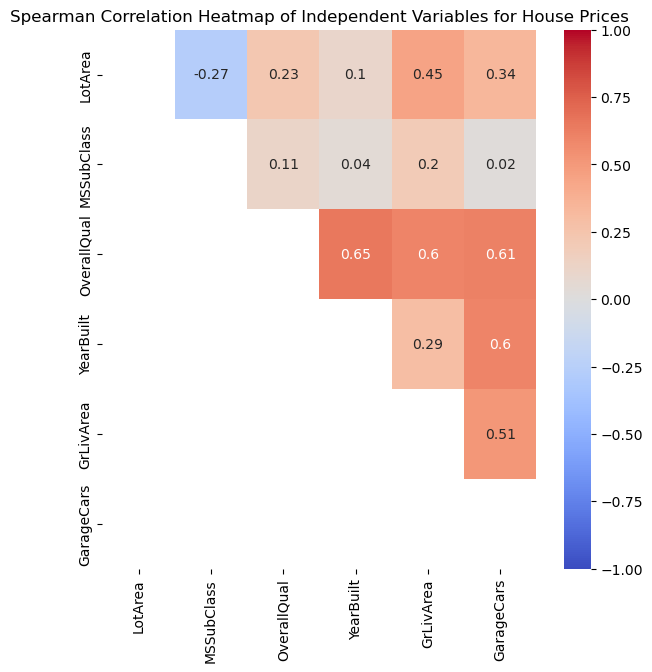

In [73]:
# Select only independent variables for correlation analysis
house_data_ind_var = house_df[['LotArea', 'MSSubClass', 'OverallQual', 'YearBuilt', 'GrLivArea', 'GarageCars']]

# Compute the Spearman correlation matrix
corr_matrix = house_data_ind_var.corr(method='spearman')

# Create a mask for the lower triangle
mask = np.tril(corr_matrix)

# Plot the heatmap
plt.figure(figsize=(7, 7))  # Adjust the figure size to make the heatmap more readable
sns.heatmap(round(corr_matrix, 2), mask=mask, vmax=1, vmin=-1, center=0, 
            cmap='coolwarm', annot=True, annot_kws={"size": 10})
plt.title('Spearman Correlation Heatmap of Independent Variables for House Prices')
plt.show()

array([[<Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'MSSubClass'}>],
       [<Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'GarageCars'}>]], dtype=object)

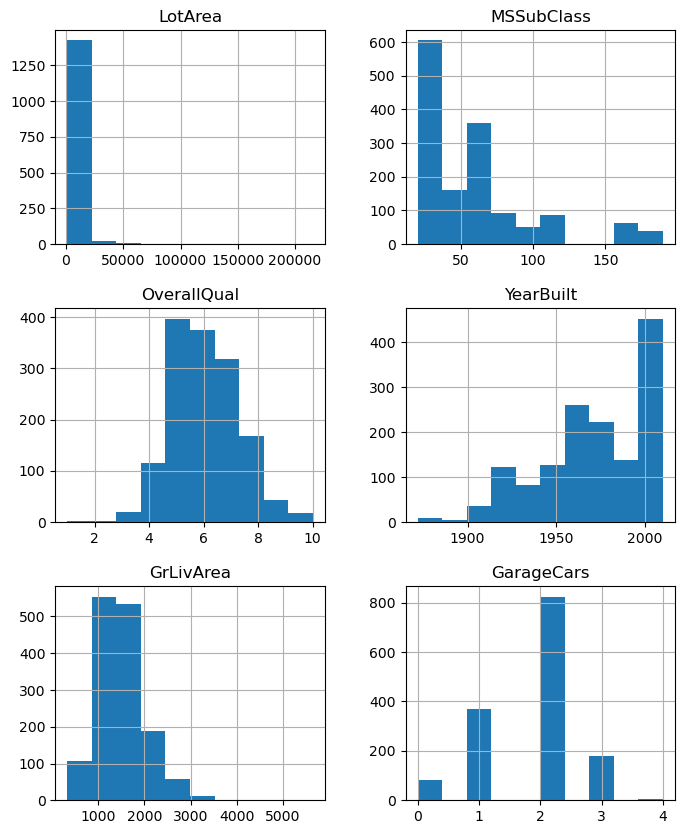

In [74]:
house_data_ind_var.hist(figsize=(8,10))

### Model Reduction

In [75]:
# Dependent variable (target)
house_data_dep_var = house_df['SalePrice']

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    house_data_ind_var, house_data_dep_var, test_size=0.25, random_state=42
)

# Combine predictors and target for train and test datasets
house_data_train = pd.concat([x_train, y_train], axis=1)
house_data_test = pd.concat([x_test, y_test], axis=1)

In [76]:
def backward_elimination(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    initial_features.remove(target)  # Exclude target variable from the feature set
    
    while True:
        formula = target + " ~ " + ' + '.join(initial_features)
        model = smf.ols(formula, data).fit()

        # Check p-values of each predictor (excluding the intercept)
        p_values = model.pvalues[1:]
        max_p_value = p_values.max()

        # If the max p-value is greater than significance level, remove the corresponding predictor
        if max_p_value > significance_level:
            excluded_feature = p_values.idxmax()  # Feature with the highest p-value
            initial_features.remove(excluded_feature)  # Remove the feature
            print(f"Excluding feature: {excluded_feature}, Max p-value: {max_p_value}")
        else:
            break  # Stop when all features have p-values below the significance level

    return initial_features

# Independent variables (predictors) for the house prices dataset
house_data_ind_var = house_df[['LotArea', 'MSSubClass', 'OverallQual', 'YearBuilt', 'GrLivArea', 'GarageCars']]

# Perform backward elimination to reduce the model
reduced_features = backward_elimination(house_data_train, 'SalePrice')

# Display reduced formula
reduced_formula = 'SalePrice ~ ' + ' + '.join(reduced_features)
print("Reduced Formula: ", reduced_formula)

# Fit the reduced model
reduced_model = smf.ols(reduced_formula, house_data_train).fit()

# Display the reduced model summary
print(reduced_model.summary())

# Generate predictions with the reduced model
predictions_reduced = reduced_model.predict(house_data_test)

Reduced Formula:  SalePrice ~ LotArea + MSSubClass + OverallQual + YearBuilt + GrLivArea + GarageCars
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     600.1
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:45:18   Log-Likelihood:                -13087.
No. Observations:                1095   AIC:                         2.619e+04
Df Residuals:                    1088   BIC:                         2.622e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

### Residuals 

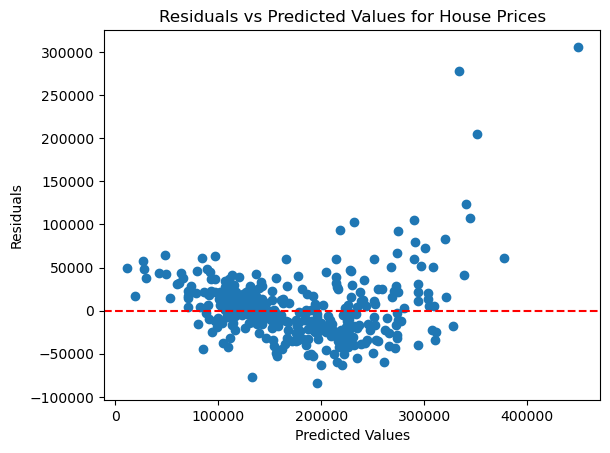

In [77]:
# Generate predictions with the reduced model
predictions_reduced = reduced_model.predict(house_data_test)

# Calculate the residuals
residuals = house_data_test['SalePrice'] - predictions_reduced

# Create the residuals plot
plt.scatter(predictions_reduced, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values for House Prices')
plt.show()

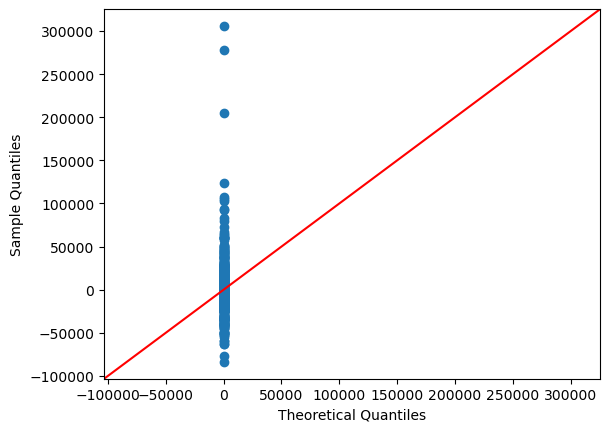

In [78]:
sm.qqplot(residuals, line ='45')
plt.show()

### Evaluation metrics

In [79]:
predictions_test = reduced_model.predict(house_data_test)

In [80]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, predictions_test)
mse = mean_squared_error(y_test, predictions_test)
rmse = mean_squared_error(y_test, predictions_test, squared=False)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

MAE: 25730.763720349107, MSE: 1535704475.4084225, RMSE: 39188.0654716257


c:\Users\Ellaine2\miniconda3\envs\env_analytics\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
